In [1]:
using AutomotiveDrivingModels
using AutoViz
using LsqFit
using Reactive, Interact
using EzXML
using UrbanDrivingSimulation

## Build Roadway

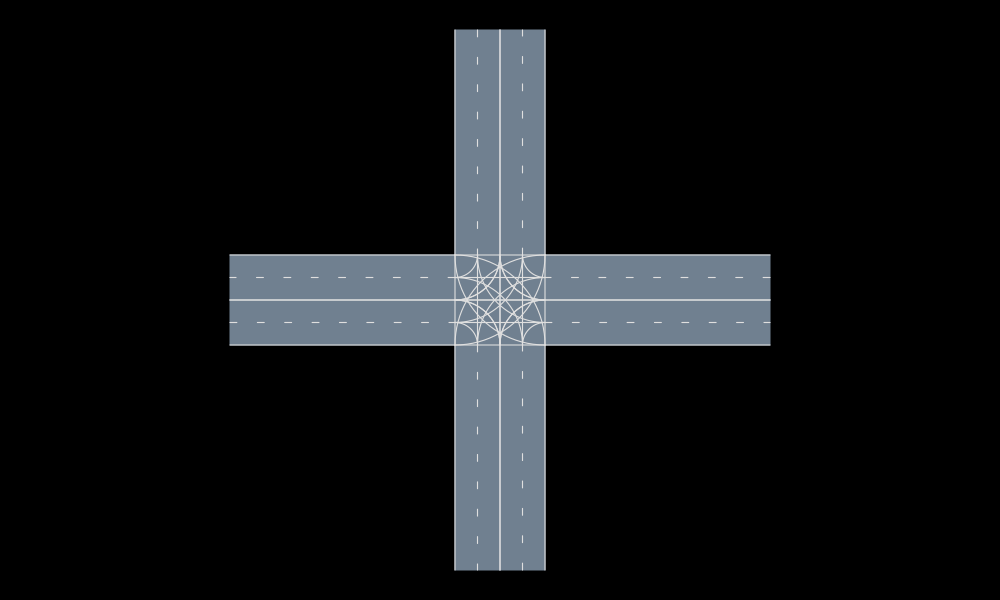

In [2]:
roadway,junction=gen_intersection(roadlength=30.0)
roadway

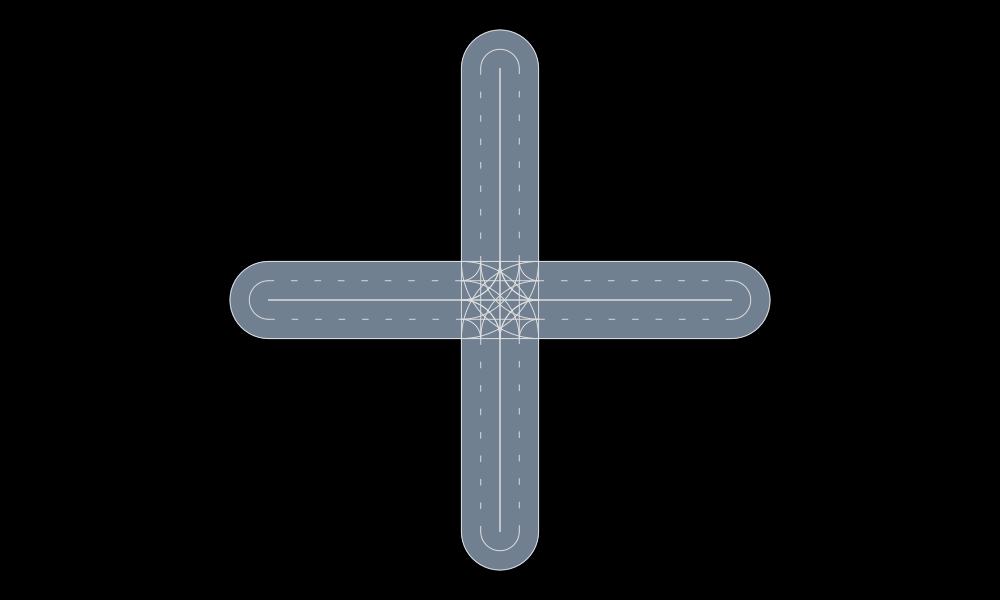

In [3]:
connect_two_seg!(roadway.segments[2],roadway.segments[3],roadway)
connect_two_seg!(roadway.segments[4],roadway.segments[5],roadway)
connect_two_seg!(roadway.segments[6],roadway.segments[7],roadway)
connect_two_seg!(roadway.segments[8],roadway.segments[1],roadway)
roadway

## Conversion

In [4]:
#Initialze
doc,r = initialize_XML()

(EzXML.Document(EzXML.Node(<DOCUMENT_NODE@0x00007fe1cc5a1750>)),EzXML.Node(<ELEMENT_NODE@0x00007fe1cc51c470>))

In [5]:
#Convert roadway and ignoring any junctions
convertRoadway!(r,roadway)

In [6]:
prettyprint(doc)

<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="30.0" junction="-1">
    <type s="0" type="rural"/>
    <link><predecessor elementType="road" elementId="24" contactPoint="end"/><successor elementType="road" elementId="17" contactPoint="start"/></link>
    <planView>
      <geometry s="0.0" x="0.0" y="0.0" hdg="0.0" length="30.0">
        <line/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="4.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="0" type="driving" level="false"><roadMark sOffset="0.0" type="solid" weight="standard" color="standard" width="0.5" laneChange="both"/></lane>
        </center>
        <right>
          <lane id="-2" type="driving" level="false">
            <width sOffset="0" a="3.0" b="0.0" c="0.0" d="0.0"/>
    

In [8]:
junctions = [junction];

In [9]:
#Handle junctions
handleJunctions(r,junctions,roadway)

In [10]:
prettyprint(doc)

<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="30.0" junction="-1">
    <type s="0" type="rural"/>
    <link><predecessor elementType="road" elementId="24" contactPoint="end"/><successor elementType="junction" elementId="1"/></link>
    <planView>
      <geometry s="0.0" x="0.0" y="0.0" hdg="0.0" length="30.0">
        <line/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="4.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="0" type="driving" level="false"><roadMark sOffset="0.0" type="solid" weight="standard" color="standard" width="0.5" laneChange="both"/></lane>
        </center>
        <right>
          <lane id="-2" type="driving" level="false">
            <width sOffset="0" a="3.0" b="0.0" c="0.0" d="0.0"/>
            <roadMark 

In [11]:
#Write out the file
#write("test_out.xodr",doc)